In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

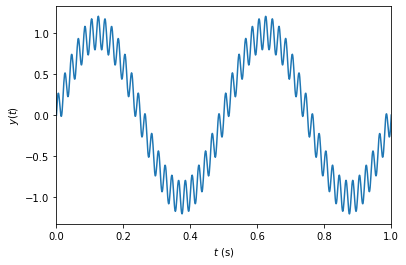

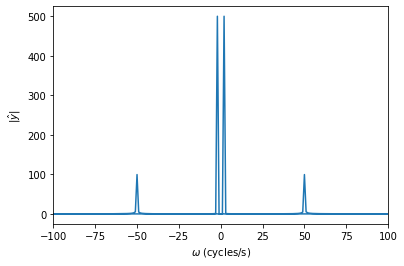

In [3]:
sampleFreq = 1000; 
tlims = [0,1]        
signalFreq = [2,50];
signalMag = [1,0.2];
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*sampleFreq)
y = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)


y_vektor = np.fft.fft(y);
fcycles = np.fft.fftfreq(len(t),d=1.0/sampleFreq); 


plt.figure()
plt.plot(t,y);
plt.ylabel("$y(t)$");
plt.xlabel("$t$ (s)");
plt.xlim([min(t),max(t)]);


plt.figure()
plt.plot(fcycles,np.absolute(y_vektor));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");

In [11]:
# Butterworth filter
wc = 2*np.pi*5; # 
n = 2; # Red

a = np.zeros(n+1);
gamma = np.pi/(2.0*n);
a[0] = 1 #Prvi jedan
for k in range(0,n):
    rfac = np.cos(k*gamma)/np.sin((k+1)*gamma);
    a[k+1] = rfac*a[k]; #

print("KOEFICIJENTI POLINOMI:" + str(a))
c = np.zeros(n+1);
for k in range(0,n+1):
    c[n-k] = a[k]/pow(wc,k)

print("KOEFICIJENTI:         " + str(c))

KOEFICIJENTI POLINOMI:[1.         1.41421356 1.        ]
KOEFICIJENTI:         [0.00101321 0.04501582 1.        ]


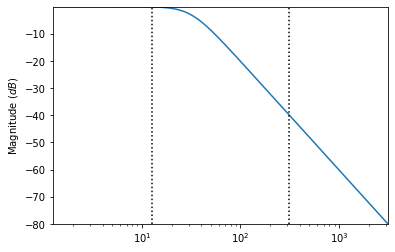

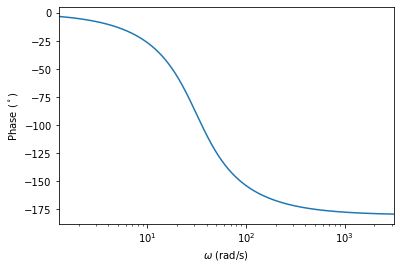

In [12]:
# Low-pass filter
w0 = 2*np.pi*5; # po
num = [1];      # 
den = c;        #
lowPass = signal.TransferFunction(num,den) # Transfer function

# Bode
w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), np.log10(max(signalFreq)*2*np.pi*10), 500 )
w, mag, phase = signal.bode(lowPass,w)

# Amprituda
plt.figure()
plt.semilogx(w, mag)
for sf in signalFreq:
    plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')
plt.ylabel("Magnitude ($dB$)")
plt.xlim([min(w),max(w)])
plt.ylim([min(mag),max(mag)])

# Faza
plt.figure()
plt.semilogx(w, phase)  
plt.ylabel("Phase ($^\circ$)")
plt.xlabel("$\omega$ (rad/s)")
plt.xlim([min(w),max(w)])
plt.show()

TransferFunctionDiscrete(
array([0.00024132, 0.00048264, 0.00024132]),
array([ 1.        , -1.95558189,  0.95654717]),
dt: 0.001
)
 b_i: [0.00024132 0.00048264 0.00024132]
 a_i: [ 1.95558189 -0.95654717]


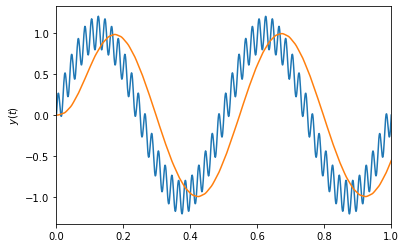

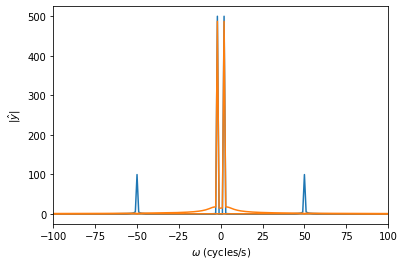

In [14]:
dt = 1.0/sampleFreq;
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)
b = discreteLowPass.num;
a = -discreteLowPass.den;

#Koeficijenti za diskritne vremenske
print(" b_i: " + str(b))
print(" a_i: " + str(a[1:]))

# 
Nb = len(b)
yfilt = np.zeros(len(y));
for m in range(3,len(y)):
    yfilt[m] = b[0]*y[m];
    for i in range(1,Nb):
        yfilt[m] += a[i]*yfilt[m-i] + b[i]*y[m-i];
    

# Plot 
plt.figure()
plt.plot(t,y);
plt.plot(t,yfilt);
plt.ylabel("$y(t)$")
plt.xlim([min(t),max(t)]);

# 
yfilt_vektor = np.fft.fft(yfilt)
fcycles = np.fft.fftfreq(len(t),d=1.0/sampleFreq)

plt.figure()
plt.plot(fcycles,np.absolute(y_vektor));
plt.plot(fcycles,np.absolute(yfilt_vektor));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");
